In [1]:
cd /Users/joepalmo/Desktop/cfa/SDU-preproc

/Users/joepalmo/Desktop/cfa/SDU-preproc


In [2]:
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.io import fits
import os

# open source module found for converting MJD/JD to DateTimes
import jdutil as jd

# Ben's module -- THANKS BEN
import LCtools

# my preprocessing module
from preproc import *

import glob


In [3]:
# specify path to the lightcurve and spectrum
lc_path = "microlensing/microlensed_quasar/HE0435_lcs.dat"
spec_path = "microlensing/microlensed_quasar/HE0435D.fits"

# object name (or abbreviation)
n = "microlensing_quasar"

# resample length for time-sorted LC purposes
resample_len = '14d'

# Time Sorted Light Curve

In [4]:
#load into pandas dataframes
lc = pd.read_csv(lc_path, 
                 sep="\s+", 
                 skiprows=2, 
                #  usecols=[0,7], 
                 names=['mjd',	'mag_A', 'magerr_A', 'mag_B', 'magerr_B', 'mag_C', 'magerr_C', 'mag_D', 'magerr_D'])

In [5]:
lc

,mjd,mag_A,magerr_A,mag_B,magerr_B,mag_C,magerr_C,mag_D,magerr_D
0,52863.88300,-10.91666,0.01310,-10.58366,0.01920,-10.12866,0.01820,-9.61666,0.02220
1,52871.82900,-10.84166,0.01670,-10.58766,0.02390,-10.15966,0.02190,-9.64766,0.02510
2,52877.84300,-10.84766,0.01200,-10.57166,0.01700,-10.05066,0.01700,-9.63466,0.01800
3,52884.78400,-10.84066,0.01200,-10.56266,0.01800,-10.05966,0.01700,-9.56766,0.01900
4,52891.82700,-10.80966,0.01680,-10.52666,0.02580,-10.03566,0.02400,-9.60666,0.02610
...,...,...,...,...,...,...,...,...,...
879,57431.10079,-11.02310,0.00287,-11.03964,0.00707,-10.50847,0.00327,-9.76305,0.00967
880,57434.03218,-11.02444,0.00389,-11.05641,0.00441,-10.49562,0.00462,-9.76726,0.00689
881,57439.03842,-11.02231,0.00807,-11.04089,0.00539,-10.49659,0.01699,-9.77646,0.00834
882,57443.04180,-11.02975,0.00751,-11.03652,0.00420,-10.48421,0.00436,-9.74552,0.00612


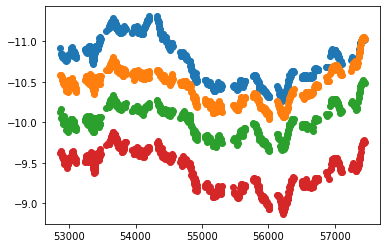

In [6]:
plt.scatter(lc['mjd'], lc['mag_A'])
plt.scatter(lc['mjd'], lc['mag_B'])
plt.scatter(lc['mjd'], lc['mag_C'])
plt.scatter(lc['mjd'], lc['mag_D'])
plt.gca().invert_yaxis()

In [7]:
lc['mag'] = lc['mag_D']

In [8]:
time_preproc_lc = LC_timesort_preproc(lc, resample_len=resample_len)

In [9]:
len(lc)

884

In [10]:
len(time_preproc_lc)

328

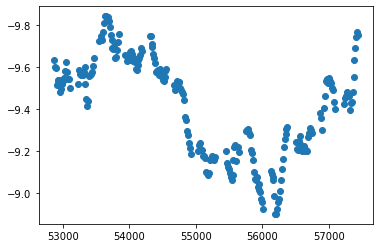

In [11]:
plt.scatter(time_preproc_lc['Modified Julian Day'], time_preproc_lc['Magnitude'])
plt.gca().invert_yaxis()

In [12]:
len(time_preproc_lc.dropna())

233

In [13]:
# The average data play rate determined empirically from sonoUno is about 
# 8.5 data rows played per second. Therefore:
print("Estimated video time of "+ str(len(time_preproc_lc) / 8.5), "s")

Estimated video time of 38.588235294117645 s


# Spectra

In [14]:
spec = fits.open(spec_path)

In [15]:
spec[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    1 / number of array dimensions                     
NAXIS1  =                 1429                                                  
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2011-05-31T15:04:29' / Date FITS file was generated                  
IRAF-TLM= '2011-05-31T15:04:29' / Time of last modification                     
CRVAL1  =                426.0                                                  
CRPIX1  =                  1.0                                                  
CTYPE1  = 'LINEAR  '                                                            
EXPTIME =                 8400                                                  
AIRMASS =                 1.07                                                  
COMMENT   FITS (Flexible Ima

In [18]:
wvl = ((np.arange(spec[0].header['NAXIS1']) + 1.0) - spec[0].header['CRPIX1']) * spec[0].header['CDELT1'] + spec[0].header['CRVAL1']

In [19]:
print(spec[0].data)

[1.25968630e-17 1.28191877e-17 1.25003157e-17 ... 4.15301538e-18
 4.26124696e-18 4.23842296e-18]


In [20]:
len(spec[0].data)

1429

In [21]:
spec[0].header['WAT1_001']

'wtype=linear label=Wavelength units=nm'

In [22]:
wvl

array([426.   , 426.269, 426.538, ..., 809.594, 809.863, 810.132])

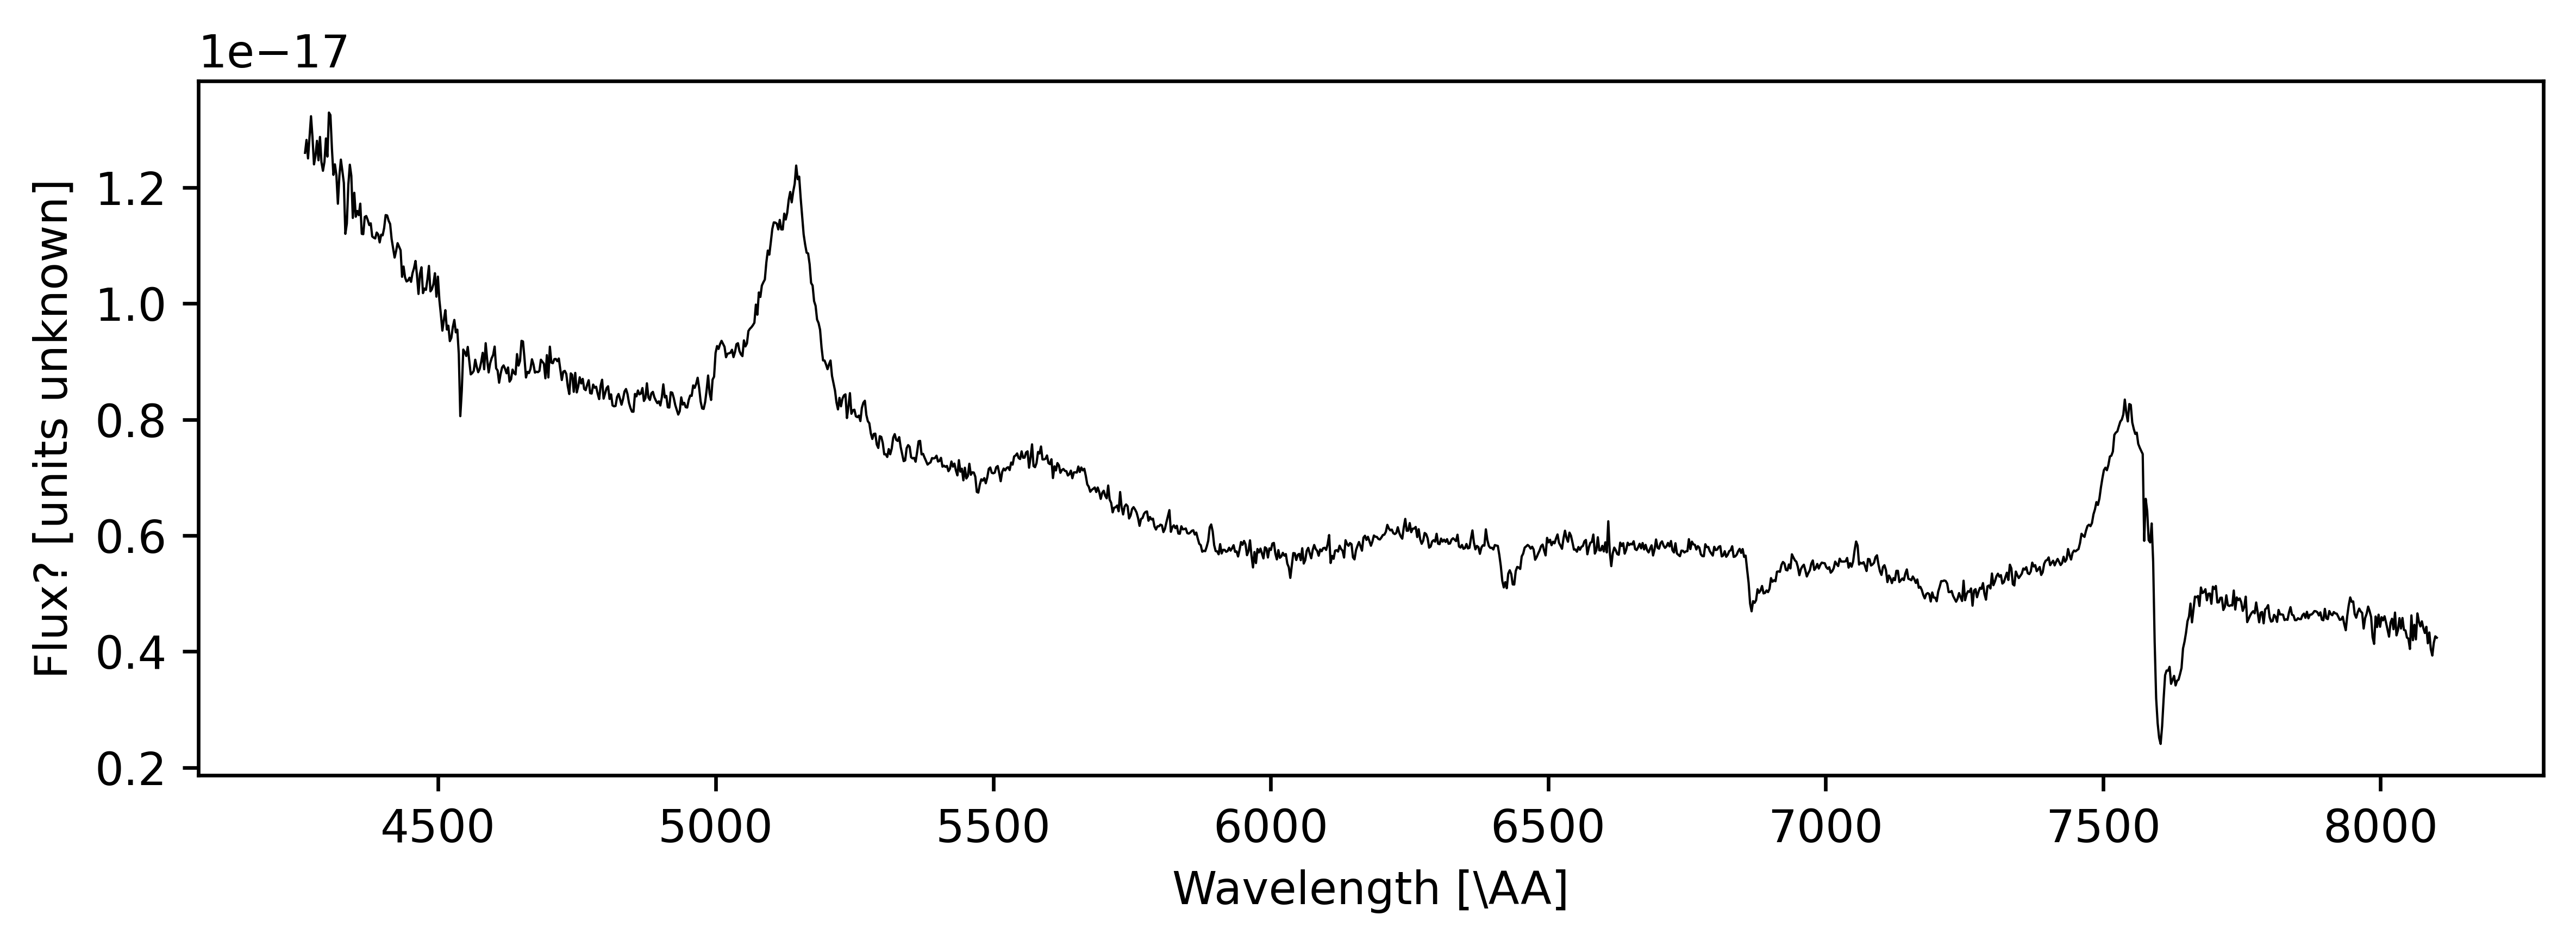

In [23]:
fig = plt.figure(figsize=(8,3), dpi=600)
ax = plt.gca()

ax.plot(wvl*10, spec[0].data, lw=0.5, c='k')

ax.set_xlabel("Wavelength [\AA]")
ax.set_ylabel("Flux? [units unknown]")

plt.tight_layout()

In [24]:
spec_df = pd.DataFrame(list(zip(wvl*10, spec[0].data*1e17)),
               columns =['wavelength', 'flux'])

In [25]:
spec_df

,wavelength,flux
0,4260.00,1.259686
1,4262.69,1.281919
2,4265.38,1.250032
3,4268.07,1.286287
4,4270.76,1.322786
...,...,...
1424,8090.56,0.404048
1425,8093.25,0.393060
1426,8095.94,0.415302
1427,8098.63,0.426125


In [30]:
preproc_spec = spectra_preproc(spec_df, bins=np.arange(4260,8100,15))

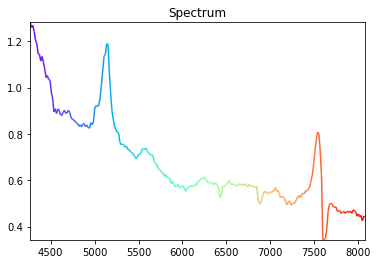

In [31]:
#preprocessed
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
fig, ax = plt.subplots()
x,y = preproc_spec['Wavelength'], preproc_spec['Flux']
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
# Create a continuous norm to map from data points to colors
norm = plt.Normalize(x.min(), x.max())
lc = LineCollection(segments, cmap='rainbow', norm=norm)
lc.set_array(x)
ax.add_collection(lc)
ax.set_title('Spectrum')
plt.show()

In [32]:
len(preproc_spec) / 8.5

30.0

# Save Preprocessed Files

In [33]:
#create output directory
outdir = 'preproc/{}/'.format(n)
if not os.path.exists(outdir):
    os.makedirs(outdir)   

In [34]:
#save preprocessed files
time_preproc_lc.to_csv("preproc/{}/{}_LC_timesort.csv".format(n,n), index=False)
preproc_spec.to_csv("preproc/{}/{}_spec.csv".format(n,n), index=False)